In [1]:
import sys #you need this to add path to utils folder
sys.path.append('../utils') #now you can import from utils folder
from configs import config_general
from dataloaders import dataloader_emg_joints
from data_utils import filter_signal_single_channel

In [2]:
#load csv file to generate example data, this is just an example, in reality we would already have these as wav files
import pandas as pd
import numpy as np

emgdata_df=pd.read_csv('../../datacollection/EMG-data.csv')

C:\Users\saile\AppData\Local\Temp\ipykernel_21184\4080974412.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#drop last two columns as we dont need class and labels
emgdata_df=emgdata_df.drop(emgdata_df.columns[-1:], axis=1)
emgdata_df=emgdata_df[:100000]
emgdata_df.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0


array([<Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>,
       <Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>,
       <Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>,
       <Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>,
       <Axes: xlabel='timesteps'>, <Axes: xlabel='timesteps'>],
      dtype=object)

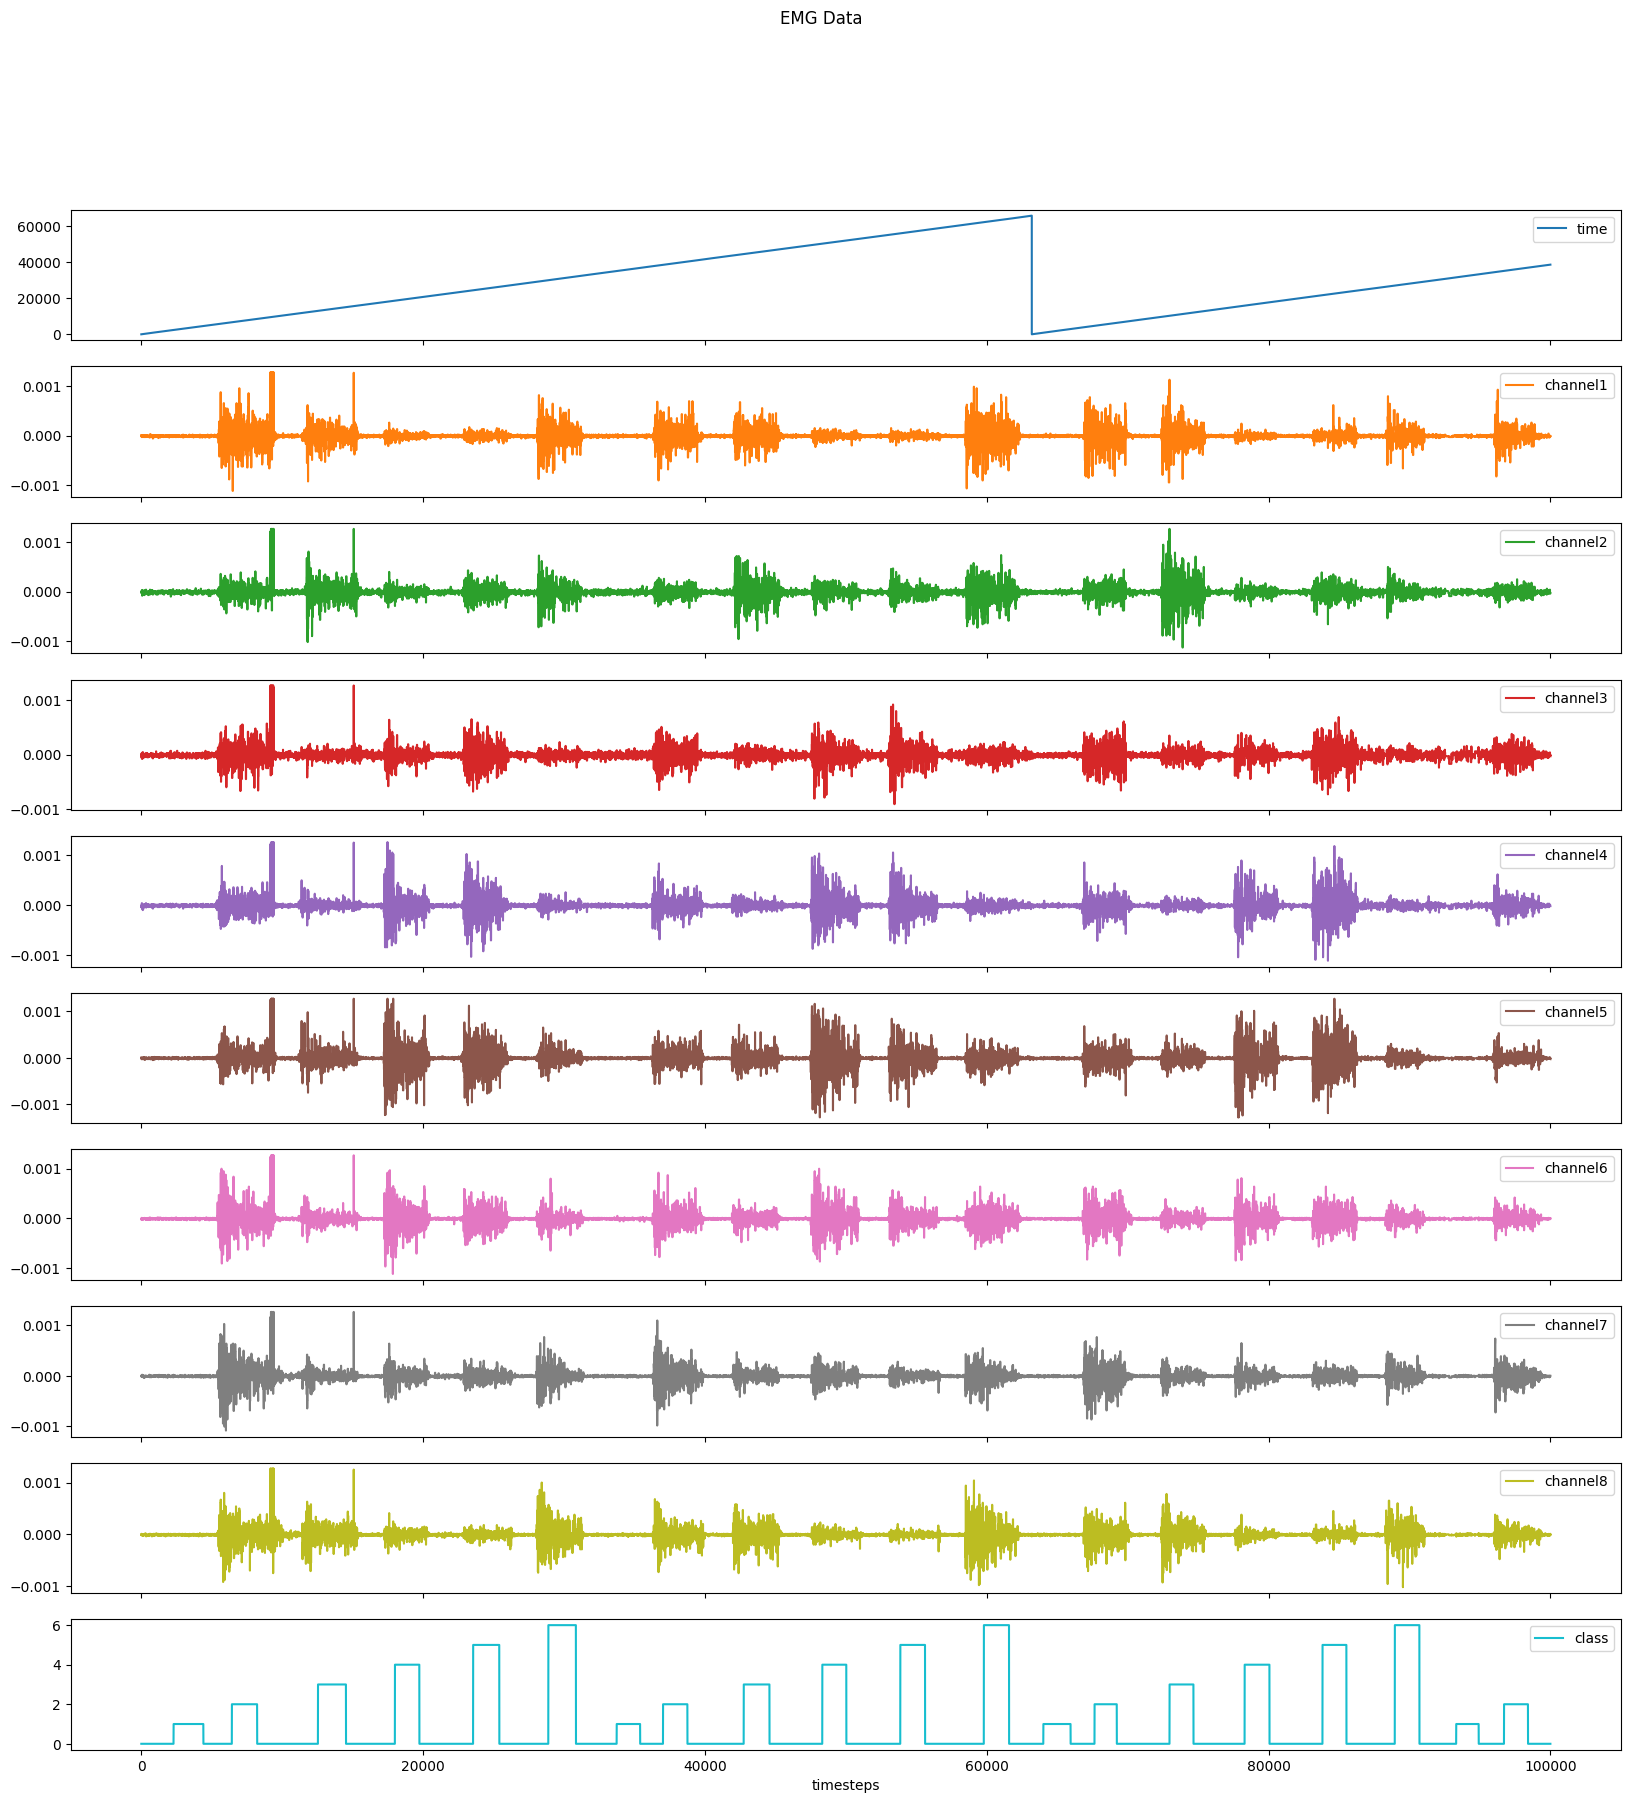

In [4]:
#plot first channel
emgdata_df.plot(subplots=True, figsize=(20,20), xlabel='timesteps', title='EMG Data')

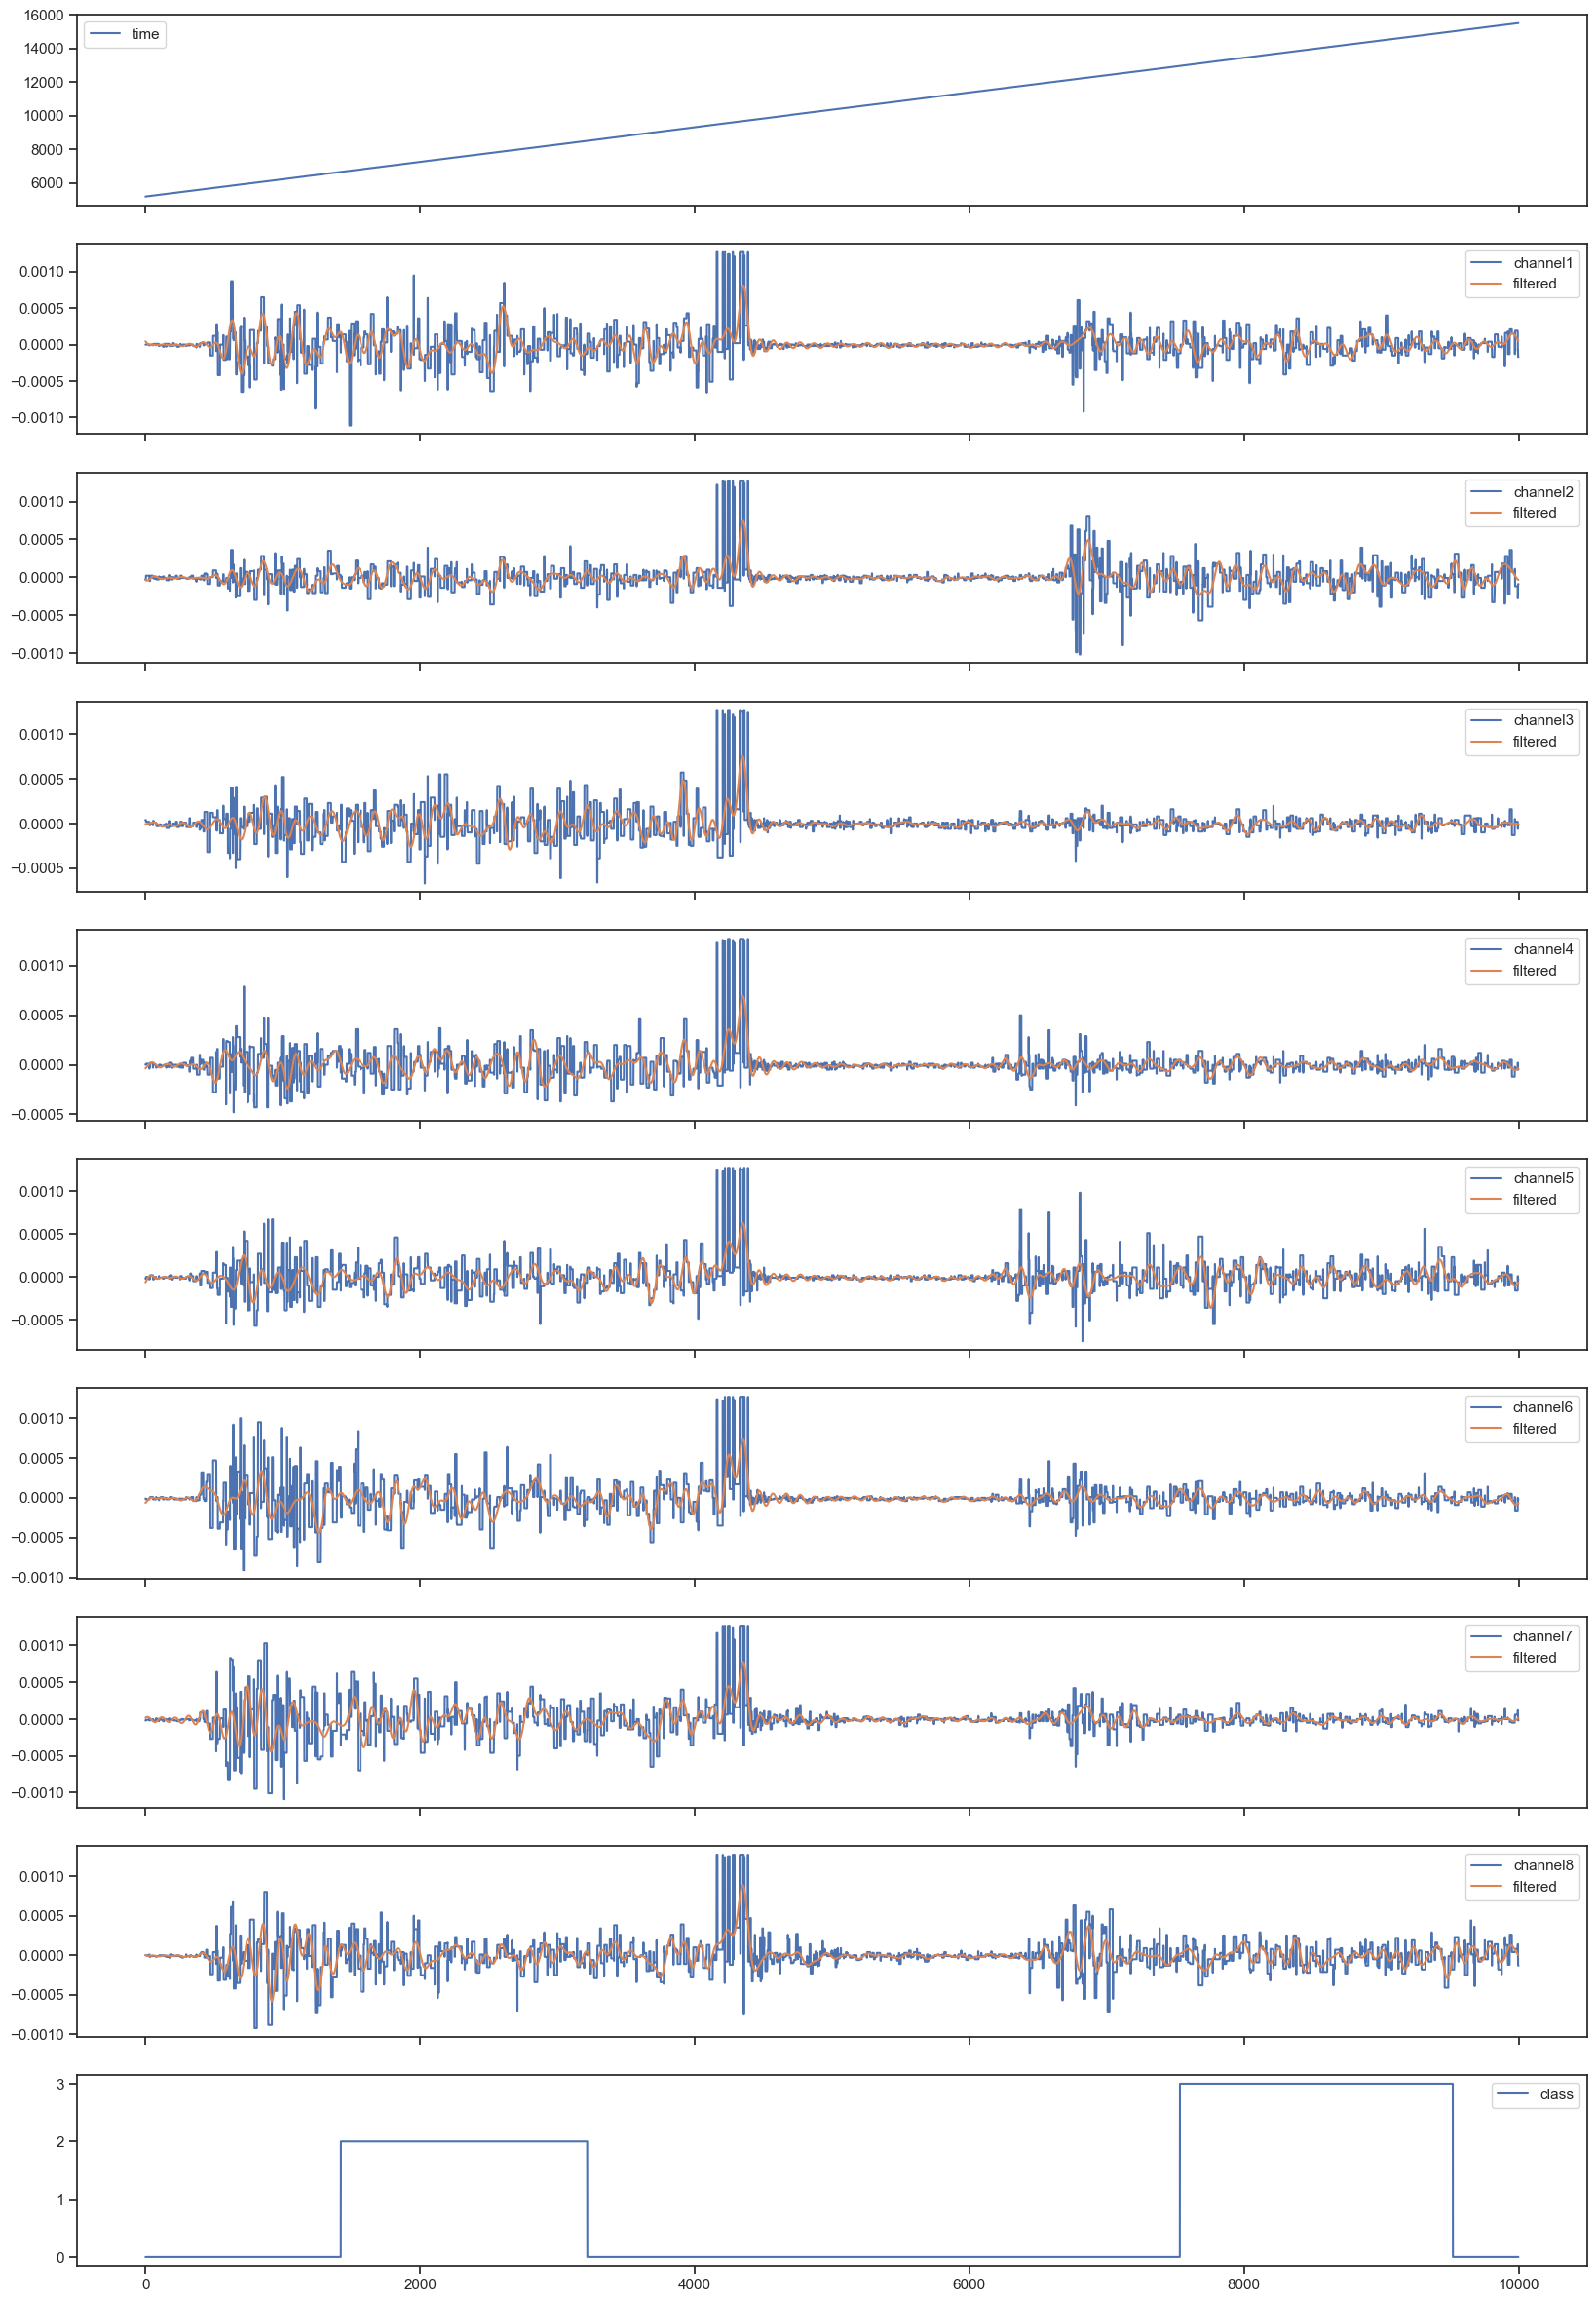

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
#plot all data
fig, axs = plt.subplots(len(emgdata_df.columns), 1, figsize=(20, 30), sharex=True)
num_samples = 10000
start = 5000
end = start + num_samples
for i in range(len(emgdata_df.columns)):
    axs[i].plot(np.array(emgdata_df)[start:end,i], label=emgdata_df.columns[i])
    if i != 0 and i != len(emgdata_df.columns)-1:
        axs[i].plot(filter_signal_single_channel(np.array(emgdata_df)[start:end,i],5e3), label='filtered')
    axs[i].legend()
    

In [27]:
fake_emg_data = emgdata_df.iloc[:,1:-2].values
fake_joint_data = emgdata_df.iloc[:,-2:].values
fake_emg_data.shape, fake_joint_data.shape

#calculate sample rate from time
time = emgdata_df['time']
sample_rate_ms = 1/(time[1]-time[0])
sample_rate =int(sample_rate_ms* 1000)
sample_rate

250

In [28]:
#save each one as a scipy wav file
from scipy.io import wavfile
wavfile.write('fake_emg_data.wav', sample_rate, fake_emg_data)
wavfile.write('fake_joint_data.wav', sample_rate, fake_joint_data)
